In [ ]:
#Problem Statement :
#Need to predict the percentage of admission of students

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.shape

(400, 9)

In [6]:
#Remove 'Serial No.' column permanently data :
df.drop('Serial No.',axis=1,inplace=True)

In [7]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
#Check Null Values :
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

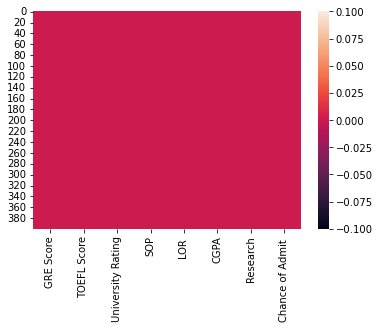

In [9]:
#Visualise Null Values :
sns.heatmap(df.isnull())
plt.show()

In [10]:
#Cross check Null Values with dtypes :
df.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [15]:
X=df.drop('Chance of Admit ',axis=1) #or X=df.iloc[:,:-1]
Y=df['Chance of Admit ']             #or Y=df.iloc[:,-1]


In [16]:
X.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')


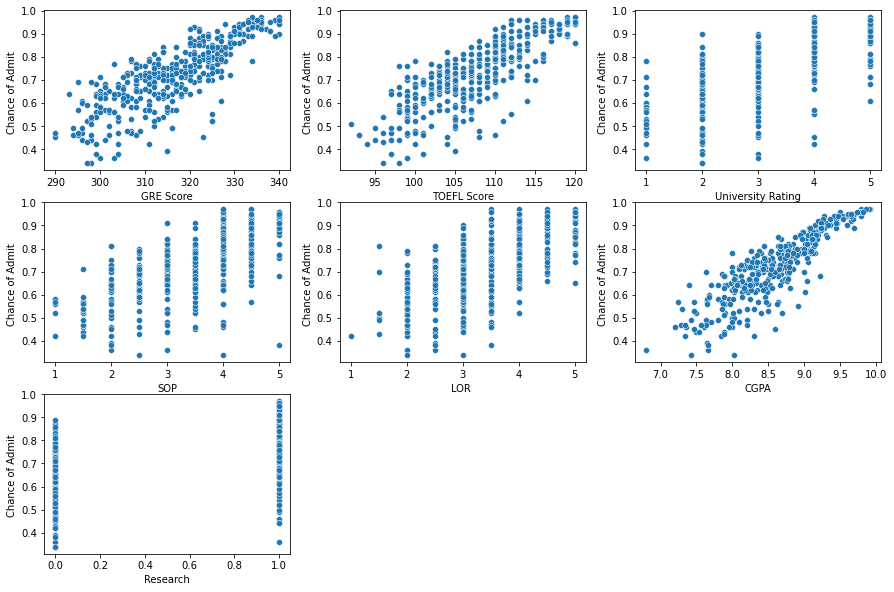

In [20]:
column=X.columns
print(column)

plt.figure(figsize=(15,10))
for i,col in enumerate(column):
    plt.subplot(3,3,i+1)
    sns.scatterplot(data=df,x=col,y='Chance of Admit ')
plt.show()

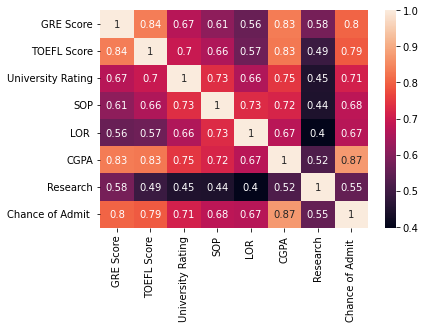

In [21]:
sns.heatmap(df.corr(),annot=True)
plt.show()

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')


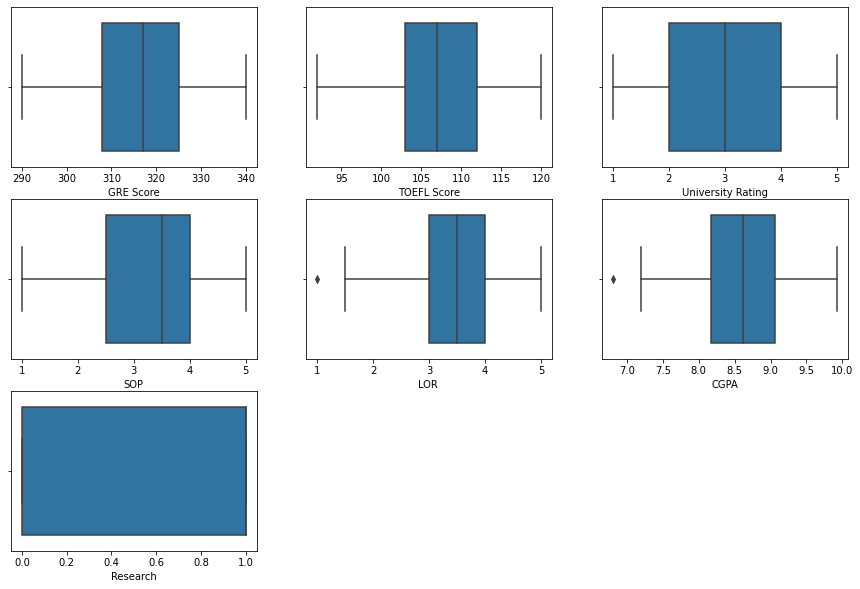

In [23]:
column=X.columns
print(column)

plt.figure(figsize=(15,10))
for i,col in enumerate(column):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=df[col])
plt.show()

In [24]:
#Train_test_split :
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [26]:
#Apply scaling on input columns :
#Import StandardScaler class :
from sklearn.preprocessing import StandardScaler

In [27]:
#Create object for StandardScaler class :
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [28]:
X_train

array([[-0.88130652,  0.08218457, -0.92883263, ...,  0.05212093,
        -1.53028029, -1.07417231],
       [-0.35515338, -0.89013991, -0.06192218, ..., -0.48839242,
        -0.5688098 , -1.07417231],
       [-1.49515186, -1.21424806, -0.06192218, ...,  0.05212093,
        -0.5856777 , -1.07417231],
       ...,
       [ 0.69715292, -0.07986951, -0.06192218, ...,  0.05212093,
         0.84809409,  0.93094934],
       [ 0.78484511,  0.56834681,  1.67189874, ...,  0.59263428,
         1.05050893,  0.93094934],
       [-1.49515186, -0.40397767, -1.79574309, ..., -1.56941911,
        -1.36160126, -1.07417231]])

In [29]:
X_test

array([[-0.44284557, -0.72808583, -0.06192218,  0.09723119,  0.59263428,
         0.29145327, -1.07417231],
       [-1.49515186, -1.21424806, -0.06192218, -1.41525397, -0.48839242,
         0.08903843,  0.93094934],
       [ 0.60946073,  0.73040089,  0.80498828,  0.60139291,  0.05212093,
         0.27458537,  0.93094934],
       [ 0.60946073, -0.07986951,  1.67189874,  0.09723119,  0.59263428,
         0.08903843,  0.93094934],
       [ 0.43407635,  0.40629273,  0.80498828,  0.60139291,  1.67366097,
         0.88182989,  0.93094934],
       [-0.79361433, -0.24192359, -0.06192218, -0.40693053, -0.48839242,
        -0.61941351, -1.07417231],
       [-0.61822995, -0.24192359, -0.92883263,  0.09723119, -1.02890576,
        -0.46760238, -1.07417231],
       [-1.49515186, -0.89013991, -0.92883263, -1.91941569, -1.56941911,
        -1.24352594, -1.07417231],
       [-0.61822995, -1.37630214, -0.92883263, -1.91941569, -1.56941911,
        -2.20499643, -1.07417231],
       [ 2.01253579,  0.7304

In [30]:
#Train the model with LinearRegression algo :
from sklearn.linear_model import LinearRegression

In [31]:
#Create object for LinearRegression class :
lr=LinearRegression()

In [33]:
#Train the data with 70% data :
lr.fit(X_train,Y_train)

LinearRegression()

In [34]:
# Find slope :
lr.coef_

array([ 0.01618263,  0.01653178,  0.01027792, -0.00013004,  0.01944541,
        0.06396097,  0.01507038])

In [35]:
X.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')

In [36]:
#Find intercept :
lr.intercept_

0.7275357142857144

In [37]:
#Test the model with 30% data :
Y_pred=lr.predict(X_test)

In [44]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [46]:
mse=mean_squared_error(Y_test,Y_pred)
print('MSE : ',mse)
rmse=np.sqrt(mse)
print('RMSE : ',rmse)

MSE :  0.0043275097253291555
RMSE :  0.0657838105108632


In [47]:
#Find R2-Score :
print('R2-Score : ',r2_score(Y_test,Y_pred))

R2-Score :  0.8103743116598119


In [48]:
lr.score(X_train,Y_train)

0.7957139978586953